In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, initializers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import joblib


In [34]:
dataset = 2

hr_file = f"D:/Ankit work/irs data/data{dataset}/hr.csv"
hd_file = f"D:/Ankit work/irs data/data{dataset}/hd.csv"
G_file = f"D:/Ankit work/irs data/data{dataset}/G.csv"

W_file = f"D:/Ankit work/irs data/data{dataset}/W.csv"

scaler_X_file = "D:/Ankit work/irs data/notebooks/only_w/scaler_X.pkl"
scaler_Y_file = "D:/Ankit work/irs data/notebooks/only_w/scaler_Y.pkl"

temp_scaler_X_file = "D:/Ankit work/irs data/notebooks/only_w/temp_scaler_X.pkl"
temp_scaler_Y_file = "D:/Ankit work/irs data/notebooks/only_w/temp_scaler_Y.pkl"

temp_modal_save_file = "D:/Ankit work/irs data/notebooks/only_w/my_trained_model_temp.keras"
modal_save_file = "D:/Ankit work/irs data/notebooks/only_w/my_trained_model.keras"

In [35]:
# Load input datasets
hr = pd.read_csv(hr_file, header=None)
hd = pd.read_csv(hd_file, header=None)
G = pd.read_csv(G_file, header=None)

# Load output datasets
W = pd.read_csv(W_file, header=None)

# Concatenate input datasets (hr, hd, G) and output datasets (W, theta)
X = pd.concat([hr, hd, G], axis=1)
Y = pd.concat([W], axis=1)

# Standardize input data
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Optionally, scale output data (depending on your needs)
scaler_Y = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y)



In [36]:
print(X.shape, X_scaled.shape)

(876650, 154) (876650, 154)


In [37]:
# Manually shuffle the dataset using pandas
X_shuffled = pd.DataFrame(X_scaled).sample(frac=1, random_state=42).reset_index(drop=True)
Y_shuffled = pd.DataFrame(Y_scaled).sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into train, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X_scaled, Y_scaled, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print(X_train.shape, Y_train.shape)

(525990, 154) (525990, 4)


In [113]:
l2_lambda = 0.00001
dropout_rate = 0.001  # Set the dropout rate (0.2 = 20%)

In [114]:
# Define the neural network
model = models.Sequential()

# Input layer (shape based on input features)
model.add(layers.InputLayer(shape=(X_train.shape[1],)))

# Hidden layers
model.add(layers.Dense(314, activation='relu', kernel_initializer=initializers.HeNormal(),  kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(layers.Dropout(dropout_rate)) 
model.add(layers.Dense(256, activation='relu', kernel_initializer=initializers.HeNormal(),  kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(layers.Dropout(dropout_rate)) 
model.add(layers.Dense(128, activation='relu', kernel_initializer=initializers.HeNormal(),  kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(layers.Dropout(dropout_rate)) 
model.add(layers.Dense(100, activation='relu', kernel_initializer=initializers.HeNormal(),  kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(layers.Dropout(dropout_rate)) 
model.add(layers.Dense(70, activation='relu', kernel_initializer=initializers.HeNormal(),  kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(layers.Dropout(dropout_rate)) 
model.add(layers.Dense(64, activation='relu', kernel_initializer=initializers.HeNormal(),  kernel_regularizer=regularizers.l2(l2_lambda)))

# Output layer
model.add(layers.Dense(Y_train.shape[1]))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [115]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Create the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

In [116]:
train_count = 1

In [117]:
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val), batch_size=128, shuffle=True, callbacks=[early_stopping])

Epoch 1/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 0.3861 - mae: 0.4171 - val_loss: 0.0453 - val_mae: 0.1236
Epoch 2/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - loss: 0.0382 - mae: 0.1081 - val_loss: 0.0253 - val_mae: 0.0858
Epoch 3/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - loss: 0.0224 - mae: 0.0783 - val_loss: 0.0144 - val_mae: 0.0600
Epoch 4/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 0.0148 - mae: 0.0641 - val_loss: 0.0106 - val_mae: 0.0522
Epoch 5/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 0.0116 - mae: 0.0573 - val_loss: 0.0097 - val_mae: 0.0522
Epoch 6/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 0.0106 - mae: 0.0555 - val_loss: 0.0098 - val_mae: 0.0547
Epoch 7/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 0.0096 - mae: 0.0526 - val_loss: 0.0072 - val_mae: 0.0425
Epoch 8/100
4110/4110 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 0.0090 - mae: 0.0510 - val_loss: 0.0087 - val_mae: 0.0517
Epoch 9/100
4110/4110 ━━

In [120]:

# Evaluate the model on training, validation, and test sets
train_loss, train_mae = model.evaluate(X_train, Y_train)
val_loss, val_mae = model.evaluate(X_val, Y_val)
test_loss, test_mae = model.evaluate(X_test, Y_test)

# Get model predictions for calculating MAPE
# train_pred = model.predict(X_train)
# val_pred = model.predict(X_val)
# test_pred = model.predict(X_test)


# Create a remark about model performance (e.g., overfitting or good fit)
if train_loss < val_loss and train_loss < test_loss:
    remark = "Possible overfitting detected."
elif val_loss <= test_loss:
    remark = "Good fit."
else:
    remark = "Model underfits the data."
    
model.save(temp_modal_save_file)  # Save as HDF5
# Save the scaler to a file
joblib.dump(scaler_X, temp_scaler_X_file)
joblib.dump(scaler_Y, temp_scaler_Y_file)


16438/16438 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 0.0057 - mae: 0.0381
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0057 - mae: 0.0380
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0058 - mae: 0.0381


['D:/Ankit work/irs data/notebooks/only_w/temp_scaler_Y.pkl']

In [121]:

# Prepare the text to log the errors and remarks
log_text = (f"Training Loss MSE: {train_loss:.4f}, Validation Loss MSE: {val_loss:.4f}, Test Loss MSE: {test_loss:.4f}\n"
            f"Training MAE: {train_mae:.4f}, Validation MAE: {val_mae:.4f}, Test MAE: {test_mae:.4f}\n"
            f"Remark: {remark}\n"
            f"He intialized , L2 Regularized (0.00001), Dropout (0.001) Early stop (Patience 10),\n" 
            # f"Learning rate scheduling (factor=0.5, patience=10, min_lr=1e-6)\n"
            f"layers: 314, 256, 128, 100, 64\n"
            "-------------------------------------------\n")

# Append the results to a text file
with open('D:/Ankit work/irs data/notebooks/only_w/model_performance_log.txt', 'a') as file:
    file.write(log_text)

print("Training, validation, and test errors saved to 'model_performance_log.txt'.")

Training, validation, and test errors saved to 'model_performance_log.txt'.


### Saving Modal

In [122]:
# Save the trained model to a file (HDF5 format or TensorFlow SavedModel format)
model.save(modal_save_file)  # Save as HDF5

# Save the scaler to a file
joblib.dump(scaler_X, scaler_X_file)
joblib.dump(scaler_Y, scaler_Y_file)


['D:/Ankit work/irs data/notebooks/only_w/scaler_Y.pkl']

### Loading Modal

In [38]:
from tensorflow.keras.models import load_model
from tensorflow import keras

# Load the model
loaded_model = keras.models.load_model(modal_save_file)

# Load the saved scaler
scaler_X_loaded = joblib.load(scaler_X_file)
scaler_Y_loaded = joblib.load(scaler_Y_file)


In [7]:
load_model = model
scaler_X_loaded = scaler_X
scaler_Y_loaded = scaler_Y

NameError: name 'model' is not defined

In [39]:
loaded_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 314)                 │          48,670 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 314)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 256)                 │          80,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 70)                  │           7,070 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 70)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 64)                  │           4,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,942 (2.14 MB)

 Trainable params: 186,980 (730.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 373,962 (1.43 MB)

### PREDICTION

In [40]:
hr_testing_file = f"D:/Ankit work/irs data/testing_data/hr.csv"
hd_testing_file = f"D:/Ankit work/irs data/testing_data/hd.csv"
G_testing_file = f"D:/Ankit work/irs data/testing_data/G.csv"

# Load input datasets
hr_testing = pd.read_csv(hr_testing_file, header=None)
hd_testing = pd.read_csv(hd_testing_file, header=None)
G_testing = pd.read_csv(G_testing_file, header=None)

# Concatenate input datasets (hr, hd, G) and output datasets (W, theta)
X_testing = pd.concat([hr_testing, hd_testing, G_testing], axis=1)

X_scaled_testing = scaler_X_loaded.transform(X_testing)
print(X_scaled_testing.shape)


(100, 154)


In [41]:
# Let's assume 'new_data_batch' is a batch of new inputs (e.g., multiple samples).
new_data_batch = X_scaled_testing

# Make predictions for the batch
scaled_predictions = loaded_model.predict(new_data_batch)
predictions = scaler_Y_loaded.inverse_transform(scaled_predictions)

# Print the predictions
print("Predictions for the batch of inputs:", predictions.shape)

# Evaluate the model on test data
test_loss, test_mae = loaded_model.evaluate(X_test, Y_test)

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/stepWARNING:tensorflow:6 out of the last 27404 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000028A8E4B1EE0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions for the batch of inputs: (100, 4)
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0058 - mae: 0.0381
Test Loss: 0.005792859476059675
Test MAE: 0.038086362183094025


In [42]:
import pandas as pd

# Assuming Y_pred is a NumPy array
# If it's not, convert it to a NumPy array: Y_pred = np.array(Y_pred)

# Convert to DataFrame
Y_pred_df = pd.DataFrame(predictions)  # Add appropriate column name(s)

# Save to CSV
Y_pred_df.to_csv('D:/Ankit work/irs data/notebooks/only_w/testing_data/only_w_pred.csv', index=False, header=False)  # index=False to avoid adding row numbers to the file


(99, 4) (9, 4)


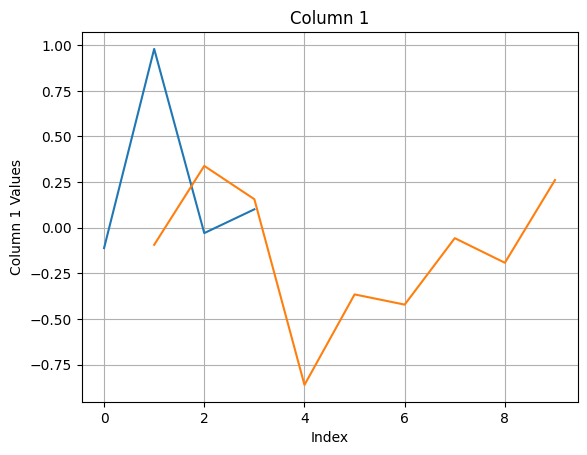

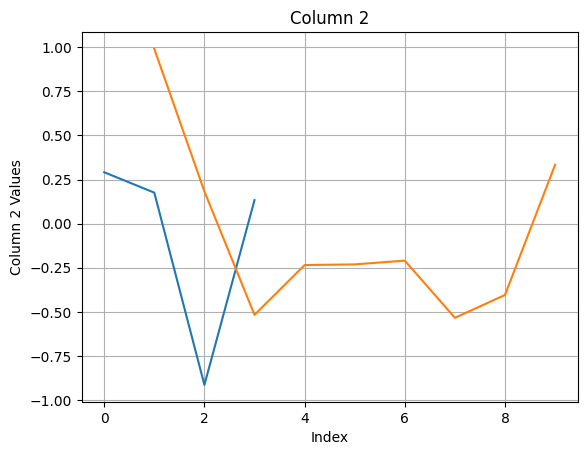

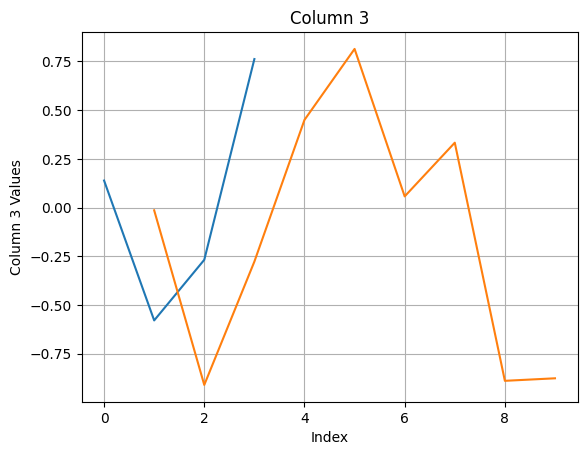

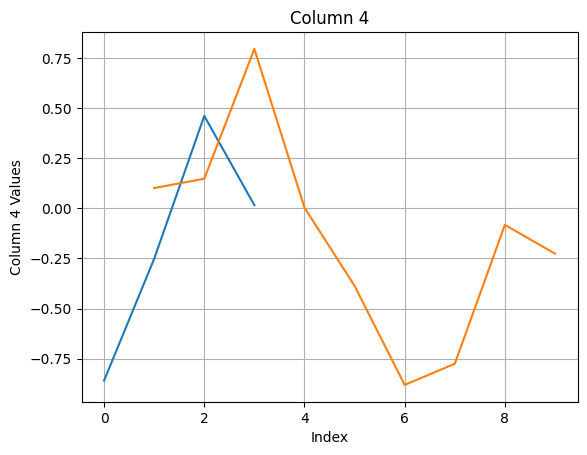

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file without a header
df = pd.read_csv('D:/Ankit work/irs data/notebooks/only_w/testing_data/predictions.csv', header=None)
df2 = pd.read_csv('D:/Ankit work/irs data/testing_data/W.csv', header=None)

print(df.shape, df2.shape)
# Plot each column separately
for i in range(df.shape[1]):  # df.shape[1] gives the number of columns
    plt.figure()  # Create a new figure for each plot
    plt.plot(df[i])  # Plot the i-th column
    plt.plot(df2[i])  # Plot the i-th column
    plt.title(f'Column {i+1}')  # Add title for clarity
    plt.xlabel('Index')  # X-axis label
    plt.ylabel(f'Column {i+1} Values')  # Y-axis label
    plt.grid(True)  # Enable grid
    plt.show()  # Show the plot
